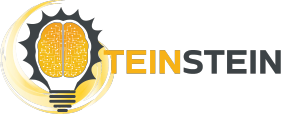

# Shortest Time Remaining Scheduling

A process scheduler schedules difeerent processes to be assigned to the CPU based on particular scheduling algorithms.

#### Preemptive Scheduling 
It is a CPU scheduling technique that works by dividing time slots of CPU to a given process.

#### Non-preemptive Scheduling 
It is a CPU scheduling technique the process takes the resource (CPU time) and holds it till the process gets terminated or is pushed to the waiting state.

### LEARNING OBJECTIVES

- Understand the working of SRT
- Learn to evaluate which process executes first according to burst time and arrival time.
- Learn the format of reading the flowchart.
- Learn implementation of complete algorithm using Python.

### Shortest Remaining Time

- Shortest remaining time (SRT) is the preemptive version of the SJN algorithm.

- The processor is allocated to the job closest to completion but it can be preempted by a newer ready job with shorter time to completion.

- Impossible to implement in interactive systems where required CPU time is not known.

- It is often used in batch environments where short jobs need to give preference.

- This SRT Scheduling is also known as Preemptive SRJ Scheduling.

#### ADVANTAGES
- Short processes are handled very quickly.
- The system also requires very little overhead since it only makes a decision when a process completes or a new process is added.
- When a new process is added the algorithm only needs to compare the currently executing process with the new process, ignoring all other processes currently waiting to execute.

#### DISADVANTAGES
- Like shortest job first, it has the potential for process starvation.
- Long processes may be held off indefinitely if short processes are continually added.


### Working Example

Here we will assume 4 Processes being carried out. These Processes will be carried out based on the `Shortest Time Remaining algorithm`. The very first program to execute would be the one with Arrival_Time=0. The next process arrives after one unit time. Since the algorithm we are using is SRTF which is a preemptive one, the current execution is stopped and the scheduler checks for the process with the least `burst time`. 
Now there are two processes in ready queue. The process with least burst time executes next. 
Similarly each process enters the Ready Queue after one unit time and at each insertion, the burst time will be calculated and the one with least burst time will be executed. 


INPUT
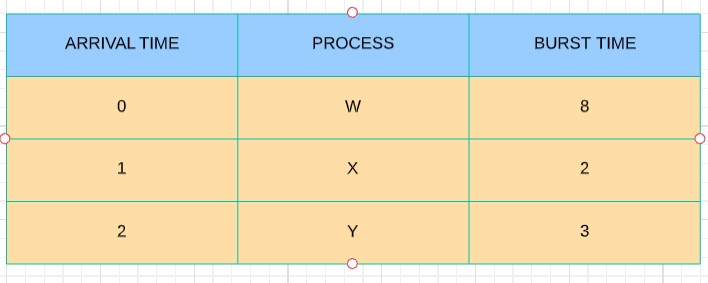

GANTT CHART
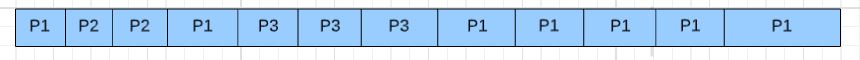

OUTPUT
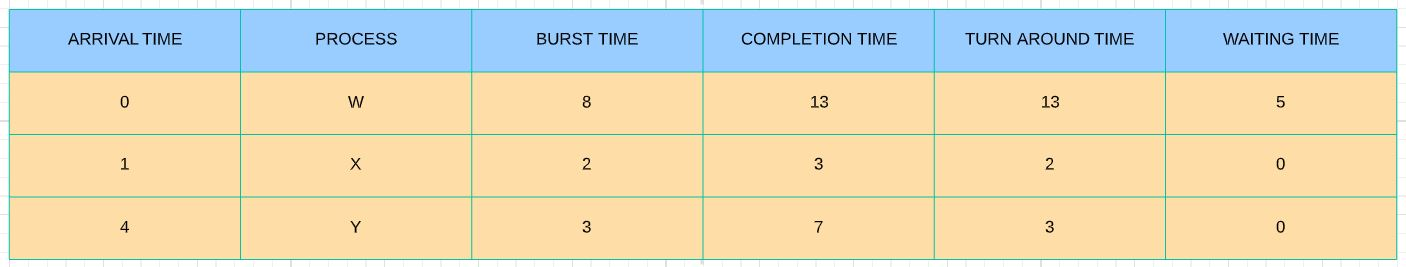

Explanation:

- At the 0th unit of the CPU, we have only process P1, so it gets executed for the 1-time unit.
- At the 1st unit of the CPU, the Process P2 also arrives. Now, the P1 needs 7 more units more to be executed, and P2 needs only 2 units. So, P2 is executed by preempting P1.
- P2 gets completed at time unit 3, and unit now no new process has arrived. So, after the completion of P2, again P1 is sent for execution.
- Now, P1 has been executed for one unit only, and we have an arrival of new process P3 at time unit 4. Now, the P1 needs 6-time units more and P3 needs only 3-time units. So, P3 is executed by preempting P1.
- P1 gets completed at time unit 7, and after that, we have the arrival of no other process. So again, P1 is sent for execution, and it gets completed at 13th unit.

The following cells contain proper implementation and explanation of SRT.

Step 1. Defining the function to evaluate waiting time and burst time

In [ ]:
# Function to find the waiting time 
# for all processes 
def findWaitingTime(processes, n, wait_time): 
    rt = [0] * n
    
    # Copy the burst time into rt[] 
    for i in range(n): 
        rt[i] = processes[i][1]
    complete = 0
    t = 0
    minm = 999999999
    short = 0
    check = False
    
    # Process until all processes gets 
    # completed 
    while (complete != n):
        
        # Find process with minimum remaining 
        # time among the processes that 
        # arrives till the current time`
        for j in range(n):
            if ((processes[j][2] <= t) and 
                (rt[j] < minm) and rt[j] > 0):
                minm = rt[j]
                short = j
                check = True
        if (check == False):
            t += 1
            continue

Explanation of Step 1.

Here we are defining a function to find waiting time and traversing until all process gets completed. 
The very first step would now be to find the mininmum remaining time among the processes present in the ready queue.

Step 2. Reducing time, Updating minimum and check for completion of processes.

In [ ]:
# Reduce remaining time by one 
        rt[short] -= 1
  
        # Update minimum 
        minm = rt[short] 
        if (minm == 0): 
            minm = 999999999
  
        # If a process gets completely 
        # executed 
        if (rt[short] == 0): 
  
            # Increment complete 
            complete += 1
            check = False
  
            # Find finish time of current 
            # process 
            fint = t + 1
  
            # Calculate waiting time 
            wt[short] = (fint - proc[short][1] -    
                                proc[short][2])
  
            if (wt[short] < 0):
                wt[short] = 0
          
        # Increment time 
        t += 1

Explanation of Step 2.

After lap of 1 unit time, the time has to be reduced by one unit and there is now a need to check if the processes have been successfully completed, in that case the  `complete+=1` (incrementation). The next step is to find the finish time of the completed process that was being executed. 
now calculate waiting time for each process wt[i]= Completion time - arrival_time-burst_time. 
Increment time lap by 1 unit.

In [ ]:
Step 3. Calculating Turn Around Time

In [ ]:
# Function to calculate turn around time 
def findTurnAroundTime(processes, n, wt, tat): 
      
    # Calculating turnaround time 
    for i in range(n):
        tat[i] = processes[i][1] + wt[i] 
  

Explanation of Step 3.

Turn around time is the total amount of time spent by the process from coming in the ready state for the first time to its completion. 
Here a function has been defined to evaluate turn around time of each process.
It will be equal to number of processe + Waiting time in case of SRT Scheduling.
It is basically the difference between arrival time and completion time.

Step 4. A function defined for waiting time and compiling all function.

In [ ]:
def findavgTime(processes, n): 
    wt = [0] * n
    tat = [0] * n 
  
    # Function to find waiting time 
    # of all processes 
    findWaitingTime(processes, n, wt) 
  
    # Function to find turn around time
    # for all processes 
    findTurnAroundTime(processes, n, wt, tat) 
  
    # Display processes along with all details 
    print("Processes    Burst Time     Waiting Time   ")
    total_wt = 0
    total_tat = 0
    for i in range(n):
  
        total_wt = total_wt + wt[i] 
        total_tat = total_tat + tat[i] 
        print(" ", processes[i][0], "\t\t", 
                   processes[i][1], "\t\t", 
                   wt[i], "\t\t", tat[i])
  
    print("\nAverage waiting time = %.5f "%(total_wt /n) )
    print("Average turn around time = ", total_tat / n) 
      

Explanation of Step 4.

An Average time for waiting(wt) and turn around time(tat) has been defined. All the previous defined functions are called and compiled under the `findavgTime`. At the end print function has been used to see the output, i.e. processes, burst time, waiting time, turn around time and avg waiting and turn around time.
After this you will have to define the variables and execute the program.


In [ ]:
Step 5. Executing the functions.

In [ ]:
# Driver code 
if __name__ =="__main__":
      
    # Process id's 
    proc = [[1, 6, 1], [2, 8, 1],
            [3, 7, 2], [4, 3, 3]]
    n = 4
    findavgTime(proc, n)

Processes  Burst time  Waiting time  
 1        6         3        9
 2        8         16       24
 3        7         8        15
 4        3         0        3
Average waiting time = 6.75
Average turn around time = 12.75


Upon execution of the above code we'll be getting this as output.